In [1]:
import glob
import time

import pandas as pd
import seaborn as sns


In [2]:
data_files = glob.glob("*/results/*.csv")

In [3]:
df_github_names_long = pd.concat(
    [ pd.read_csv(fp) for fp in data_files], 
    axis=0, 
    keys=data_files, 
    names=["source", "row"]
).reset_index("source").reset_index(drop=True)
df_github_names_long

,source,github_user_id,uu_user_id
0,github_search/results/ids_search_repos.csv,jonasmoons,NaN
1,github_search/results/ids_search_repos.csv,gglucass,NaN
2,github_search/results/ids_search_repos.csv,MarcelRobeer,NaN
3,github_search/results/ids_search_repos.csv,ekatrukha,NaN
4,github_search/results/ids_search_repos.csv,UtrechtUniversity,NaN
...,...,...,...
518,pure/results/ids_pure_users.csv,keesmulder,NaN
519,pure/results/ids_pure_users.csv,RianneSchouten,NaN
520,pure/results/ids_pure_users.csv,ydluo,NaN
521,pure/results/ids_pure_users.csv,marnixnaber,NaN


In [4]:
df_github_names_crosstab = pd.crosstab(df_github_names_long["github_user_id"], df_github_names_long["source"])
df_github_names_crosstab

source,github_search/results/ids_search_repos.csv,github_search/results/ids_search_users.csv,github_search/results/ids_topic_repos.csv,pure/results/ids_pure_users.csv,university_profile_pages/results/employees_github_from_cv_urls.csv,university_profile_pages/results/employees_github_from_links_urls.csv,university_profile_pages/results/employees_github_from_profile_urls.csv
github_user_id,,,,,,,
19giorgosts,0,1,0,0,0,0,0
4009509,0,1,0,0,0,0,0
73616e646572,0,0,0,0,0,1,0
AJueling,1,1,0,0,0,0,0
ARYENN,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
xavierpinho23,0,1,0,0,0,0,0
yaikohi,0,1,0,0,0,0,0
ydluo,0,0,0,1,0,0,0


In [15]:
df_github_names_crosstab["sum_github"] = df_github_names_crosstab["github_search/results/ids_search_repos.csv"] + df_github_names_crosstab["github_search/results/ids_search_users.csv"] +   df_github_names_crosstab["github_search/results/ids_topic_repos.csv"]
df_github_names_crosstab["sum_university_profile_pages"] = df_github_names_crosstab["university_profile_pages/results/employees_github_from_cv_urls.csv"] + df_github_names_crosstab["university_profile_pages/results/employees_github_from_links_urls.csv"] + df_github_names_crosstab["university_profile_pages/results/employees_github_from_profile_urls.csv"]


In [16]:
df_github_names_crosstab

source,github_search/results/ids_search_repos.csv,github_search/results/ids_search_users.csv,github_search/results/ids_topic_repos.csv,pure/results/ids_pure_users.csv,university_profile_pages/results/employees_github_from_cv_urls.csv,university_profile_pages/results/employees_github_from_links_urls.csv,university_profile_pages/results/employees_github_from_profile_urls.csv,sum_github,sum_university_profile_pages
github_user_id,,,,,,,,,
19giorgosts,0,1,0,0,0,0,0,1,0
4009509,0,1,0,0,0,0,0,1,0
73616e646572,0,0,0,0,0,1,0,0,1
AJueling,1,1,0,0,0,0,0,2,0
ARYENN,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
xavierpinho23,0,1,0,0,0,0,0,1,0
yaikohi,0,1,0,0,0,0,0,1,0
ydluo,0,0,0,1,0,0,0,0,0


source
github_search/results/ids_search_repos.csv                                 208
github_search/results/ids_search_users.csv                                 223
github_search/results/ids_topic_repos.csv                                   24
pure/results/ids_pure_users.csv                                             18
university_profile_pages/results/employees_github_from_cv_urls.csv           2
university_profile_pages/results/employees_github_from_links_urls.csv       29
university_profile_pages/results/employees_github_from_profile_urls.csv     19
sum_github                                                                 455
sum_university_profile_pages                                                50
dtype: int64


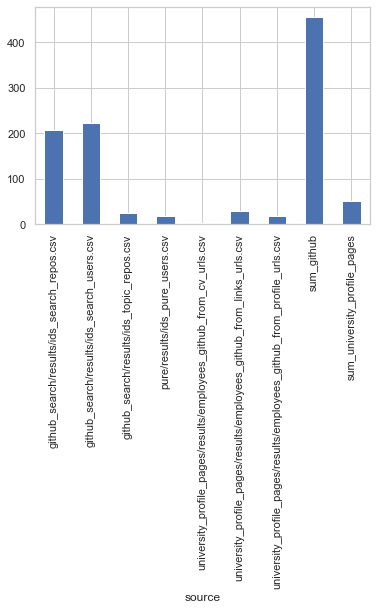

In [71]:
sum_columns = df_github_names_crosstab.sum(axis=0)
sum_columns.plot.bar()

print(sum_columns)

In [59]:
unique_users_github = pd.read_csv('unique_users.csv')

In [67]:
unique_users_github

,github_user_id,uu_user_id,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,following_url,...,hireable,bio,twitter_username,public_repos,public_gists,followers,following,created_at,updated_at,is_student
0,ajinkyakadu125,AAKadu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,msdslab,AGJvandeSchoot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,alexandrosstergiou,AGStergiou,25504317.0,MDQ6VXNlcjI1NTA0MzE3,https://avatars.githubusercontent.com/u/255043...,NaN,https://api.github.com/users/alexandrosstergiou,https://github.com/alexandrosstergiou,https://api.github.com/users/alexandrosstergio...,https://api.github.com/users/alexandrosstergio...,...,True,Computer Vision and Machine Learning Researcher,NaN,20.0,0.0,35.0,6.0,2017-02-02T11:23:32Z,2021-04-16T12:44:56Z,False
3,annawegmann,AMWegmann,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,amacanovic,AMacanovic,57662333.0,MDQ6VXNlcjU3NjYyMzMz,https://avatars.githubusercontent.com/u/576623...,NaN,https://api.github.com/users/amacanovic,https://github.com/amacanovic,https://api.github.com/users/amacanovic/followers,https://api.github.com/users/amacanovic/follow...,...,NaN,NaN,NaN,3.0,0.0,2.0,1.0,2019-11-12T09:29:13Z,2021-03-17T10:28:21Z,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,keesmulder,NaN,7806295.0,MDQ6VXNlcjc4MDYyOTU=,https://avatars.githubusercontent.com/u/780629...,NaN,https://api.github.com/users/keesmulder,https://github.com/keesmulder,https://api.github.com/users/keesmulder/followers,https://api.github.com/users/keesmulder/follow...,...,NaN,Data Scientist at EY VODW,NaN,19.0,0.0,15.0,22.0,2014-06-05T14:26:12Z,2021-03-05T21:53:26Z,False
417,RianneSchouten,NaN,22293115.0,MDQ6VXNlcjIyMjkzMTE1,https://avatars.githubusercontent.com/u/222931...,NaN,https://api.github.com/users/RianneSchouten,https://github.com/RianneSchouten,https://api.github.com/users/RianneSchouten/fo...,https://api.github.com/users/RianneSchouten/fo...,...,NaN,Missing Data Specialist / Developer Data & Ana...,NaN,10.0,0.0,17.0,0.0,2016-09-19T10:28:49Z,2021-03-26T15:28:53Z,False
418,ydluo,NaN,13563303.0,MDQ6VXNlcjEzNTYzMzAz,https://avatars.githubusercontent.com/u/135633...,NaN,https://api.github.com/users/ydluo,https://github.com/ydluo,https://api.github.com/users/ydluo/followers,https://api.github.com/users/ydluo/following{/...,...,NaN,NaN,NaN,1.0,0.0,18.0,0.0,2015-07-30T00:37:13Z,2021-03-26T14:37:03Z,False
419,marnixnaber,NaN,31031471.0,MDQ6VXNlcjMxMDMxNDcx,https://avatars.githubusercontent.com/u/310314...,NaN,https://api.github.com/users/marnixnaber,https://github.com/marnixnaber,https://api.github.com/users/marnixnaber/follo...,https://api.github.com/users/marnixnaber/follo...,...,NaN,NaN,NaN,1.0,0.0,2.0,0.0,2017-08-15T08:03:55Z,2021-03-19T08:40:20Z,False


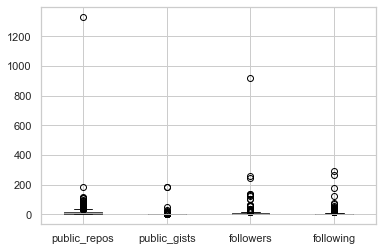

In [68]:
unique_users_github
boxplot = unique_users_github.boxplot(column=['public_repos','public_gists', 'followers', 'following'])


/Users/chris/miniconda3/envs/uu/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='public_repos'>

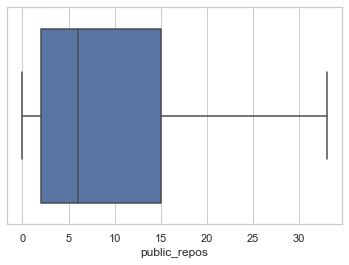

In [64]:
 sns.boxplot(unique_users_github['public_repos'], showfliers = False)

/Users/chris/miniconda3/envs/uu/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='public_gists'>

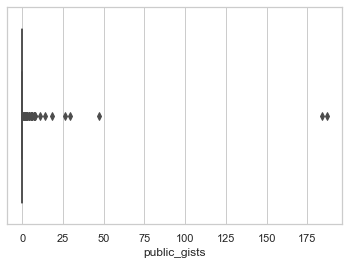

In [70]:
sns.boxplot(unique_users_github['public_gists'])


/Users/chris/miniconda3/envs/uu/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='followers'>

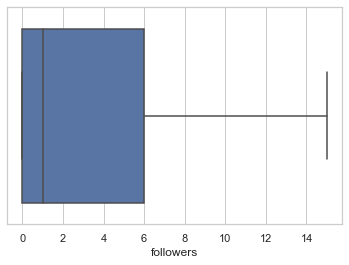

/Users/chris/miniconda3/envs/uu/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='following'>

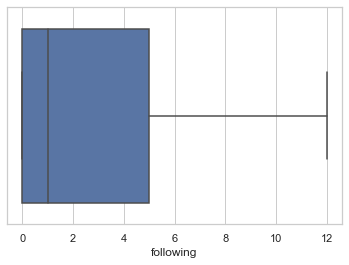

In [66]:
sns.boxplot(unique_users_github['following'], showfliers = False)
